<a href="https://colab.research.google.com/github/internship-kaard/zenteiq-kaard/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Develop a machine learning model that can predict student dropout rates or academic success based on a variety of factors, such as attendance, grades, and demographic data. The model should be able to identify students who are at risk of dropping out or falling behind and provide targeted interventions and support.**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
#from sklearn.pipeline import Pipeline
#from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, precision_score, recall_score, f1_score

In [ ]:
#data loading
df = pd.read_csv('dataset.csv')
#view the data
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.00,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.67,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.00,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.40,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.00,0,13.9,-0.3,0.79,Graduate


In [ ]:
#finding null
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [ ]:
#finding duplicates
df.duplicated().sum()

0

In [ ]:
#EDA - Exploratory Data Analysis
##dimension of the dataframe
df.shape

(4424, 37)

In [ ]:
##basic information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
##statistical summary
from pandas.io.formats.format import set_option
set_option('display.precision',2)
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,...,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4.42e+03
mean,1.18,18.67,1.73,8856.64,0.89,4.58,132.61,1.87,19.56,22.28,...,0.14,0.54,6.23,8.06,4.44,10.23,0.15,11.57,1.23,1.97e-03
std,0.61,17.48,1.31,2063.57,0.31,10.22,13.19,6.91,15.60,15.34,...,0.69,1.92,2.20,3.95,3.01,5.21,0.75,2.66,1.38,2.27e+00
min,1.00,1.00,0.00,33.00,0.00,1.00,95.00,1.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.60,-0.80,-4.06e+00
25%,1.00,1.00,1.00,9085.00,1.00,1.00,125.00,1.00,2.00,3.00,...,0.00,0.00,5.00,6.00,2.00,10.75,0.00,9.40,0.30,-1.70e+00
50%,1.00,17.00,1.00,9238.00,1.00,1.00,133.10,1.00,19.00,19.00,...,0.00,0.00,6.00,8.00,5.00,12.20,0.00,11.10,1.40,3.20e-01
75%,1.00,39.00,2.00,9556.00,1.00,1.00,140.00,1.00,37.00,37.00,...,0.00,0.00,7.00,10.00,6.00,13.33,0.00,13.90,2.60,1.79e+00
max,6.00,57.00,9.00,9991.00,1.00,43.00,190.00,109.00,44.00,44.00,...,12.00,19.00,23.00,33.00,20.00,18.57,12.00,16.20,3.70,3.51e+00


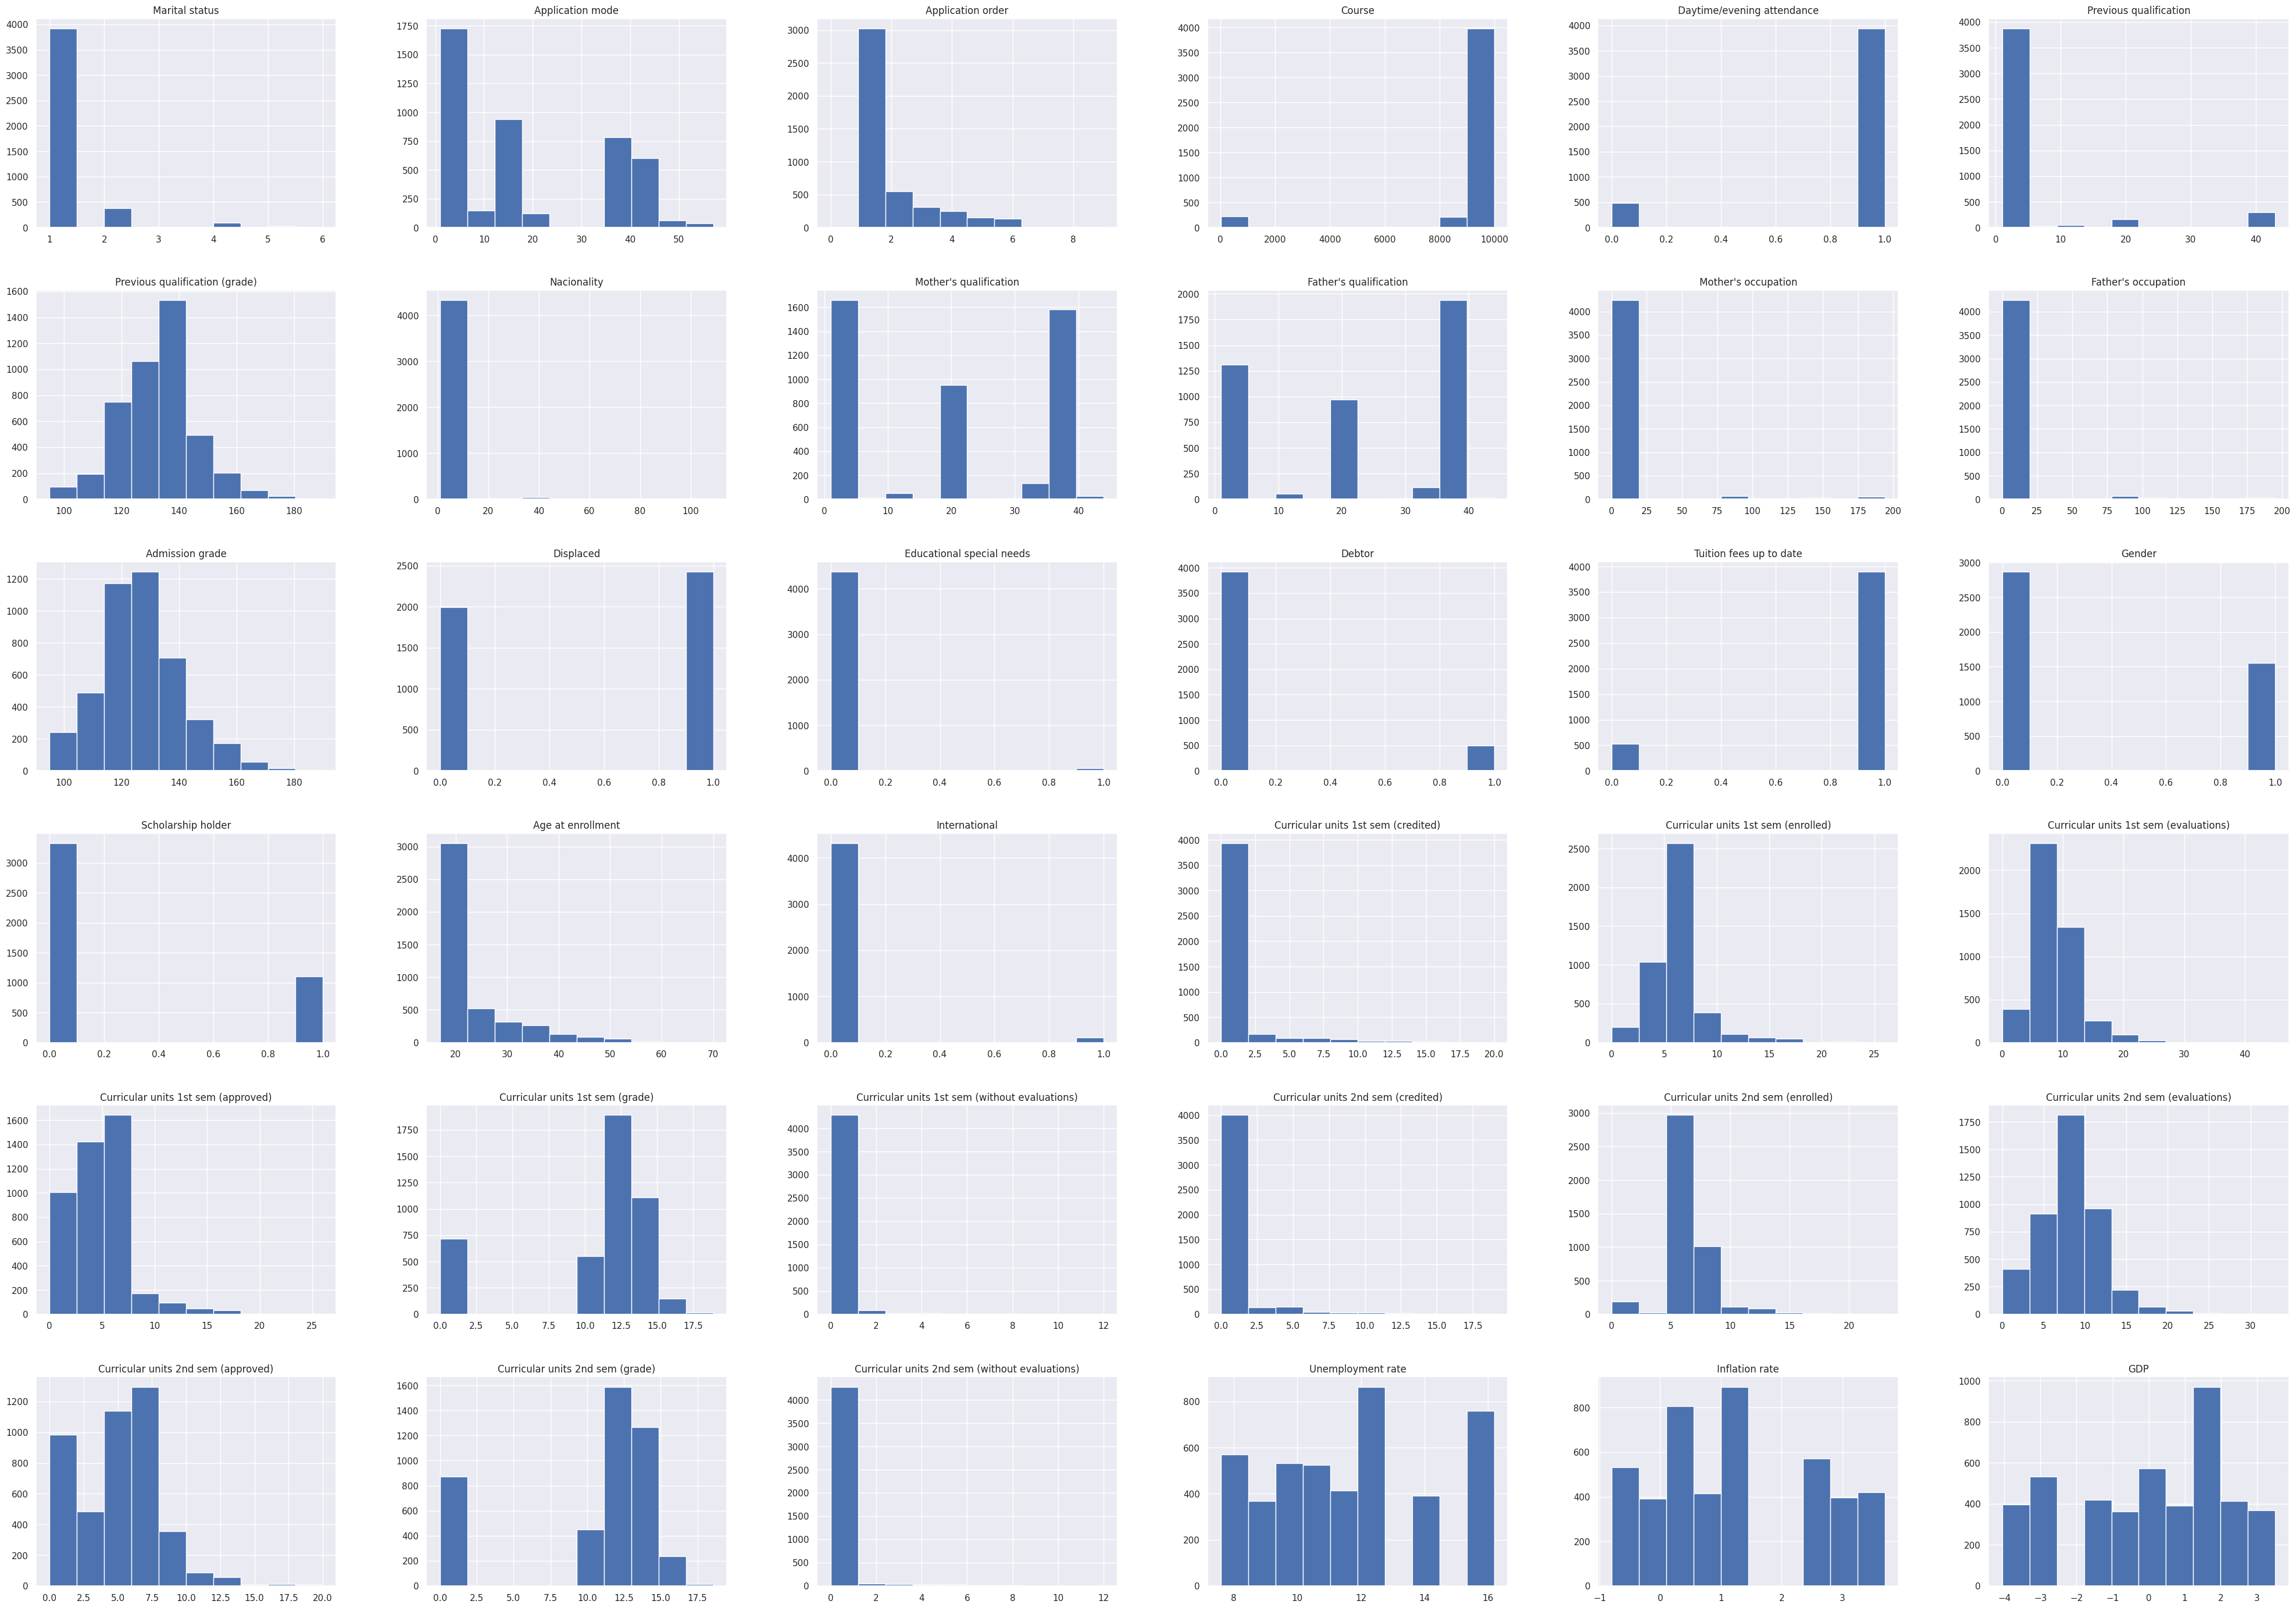

In [ ]:
##histogram - visual representation
sns.set_theme(style = 'darkgrid')
df.hist(bins=10, figsize=(50, 35), grid=True, legend=None);

In [ ]:
list(df)

['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rat

In [ ]:
##finding unique values
for col in list(df):
  print(df[col].unique())

[1 2 4 3 5 6]
[17 15  1 39 18 53 44 51 43  7 42 16  5  2 10 57 26 27]
[5 1 2 4 3 6 9 0]
[ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119]
[1 0]
[ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14]
[122.  160.  100.  133.1 142.  119.  137.  138.  139.  136.  133.  110.
 149.  127.  135.  140.  125.  126.  151.  115.  150.  143.  130.  120.
 103.  154.  132.  167.  129.  141.  116.  148.  118.  106.  121.  114.
 124.  123.  113.  111.  131.  158.  146.  117.  153.  178.   99.  134.
 128.  170.  155.  145.  152.  112.  107.  156.  188.   96.  161.  166.
 147.  144.  102.  101.  180.  172.  105.  108.  165.  190.  162.  164.
 163.  159.  117.4 175.  133.8 176.  168.  139.3  97.  157.  140.8 184.4
 148.9 109.  174.  182.  138.6  95.  154.4 163.3 145.7 123.9 124.4 169.
 177.  138.7 119.1 118.9 126.6]
[  1  62   6  41  26 103  13  25  21 101  11  22  32 100  24 109   2 108
 105  14  17]
[19  1 37 38  3  4 42  2 34 12 40  9  5 39 11 41 30 14 35 36  6 10 29

In [ ]:
df.describe(include='all').loc['unique', :]

Marital status                                    NaN
Application mode                                  NaN
Application order                                 NaN
Course                                            NaN
Daytime/evening attendance                        NaN
Previous qualification                            NaN
Previous qualification (grade)                    NaN
Nacionality                                       NaN
Mother's qualification                            NaN
Father's qualification                            NaN
Mother's occupation                               NaN
Father's occupation                               NaN
Admission grade                                   NaN
Displaced                                         NaN
Educational special needs                         NaN
Debtor                                            NaN
Tuition fees up to date                           NaN
Gender                                            NaN
Scholarship holder          

In [ ]:
df.loc[:,'Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [ ]:
#df.astype('object').describe(include='all').loc['unique', :]

In [ ]:
df['International'].unique()

array([0, 1])

In [ ]:
df['Marital status'].unique()

array([1, 2, 4, 3, 5, 6])

In [ ]:
# Creating a copy of the dataset
s_df=df.copy() 
enrolled_data = df[s_df["Target"]=="Enrolled"]
# Changing the Target to numerical Value 0 or 1. We are predicting if a Student is gonna Dropout or Graduate, ignoring the ones who are Enrolled.
s_df.replace("Dropout",1,inplace=True) 
s_df.replace("Graduate",0,inplace=True)
s_df.drop(s_df[s_df["Target"]=="Enrolled"].index,inplace=True)
s_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.00,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.67,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.00,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.40,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.00,0,13.9,-0.3,0.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.67,0,15.5,2.8,-4.06,0
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.00,0,11.1,0.6,2.02,1
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.50,0,13.9,-0.3,0.79,1
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.00,0,9.4,-0.8,-3.12,0


In [ ]:
s_df.loc[:,'Target'].value_counts()

0    2209
1    1421
Name: Target, dtype: int64

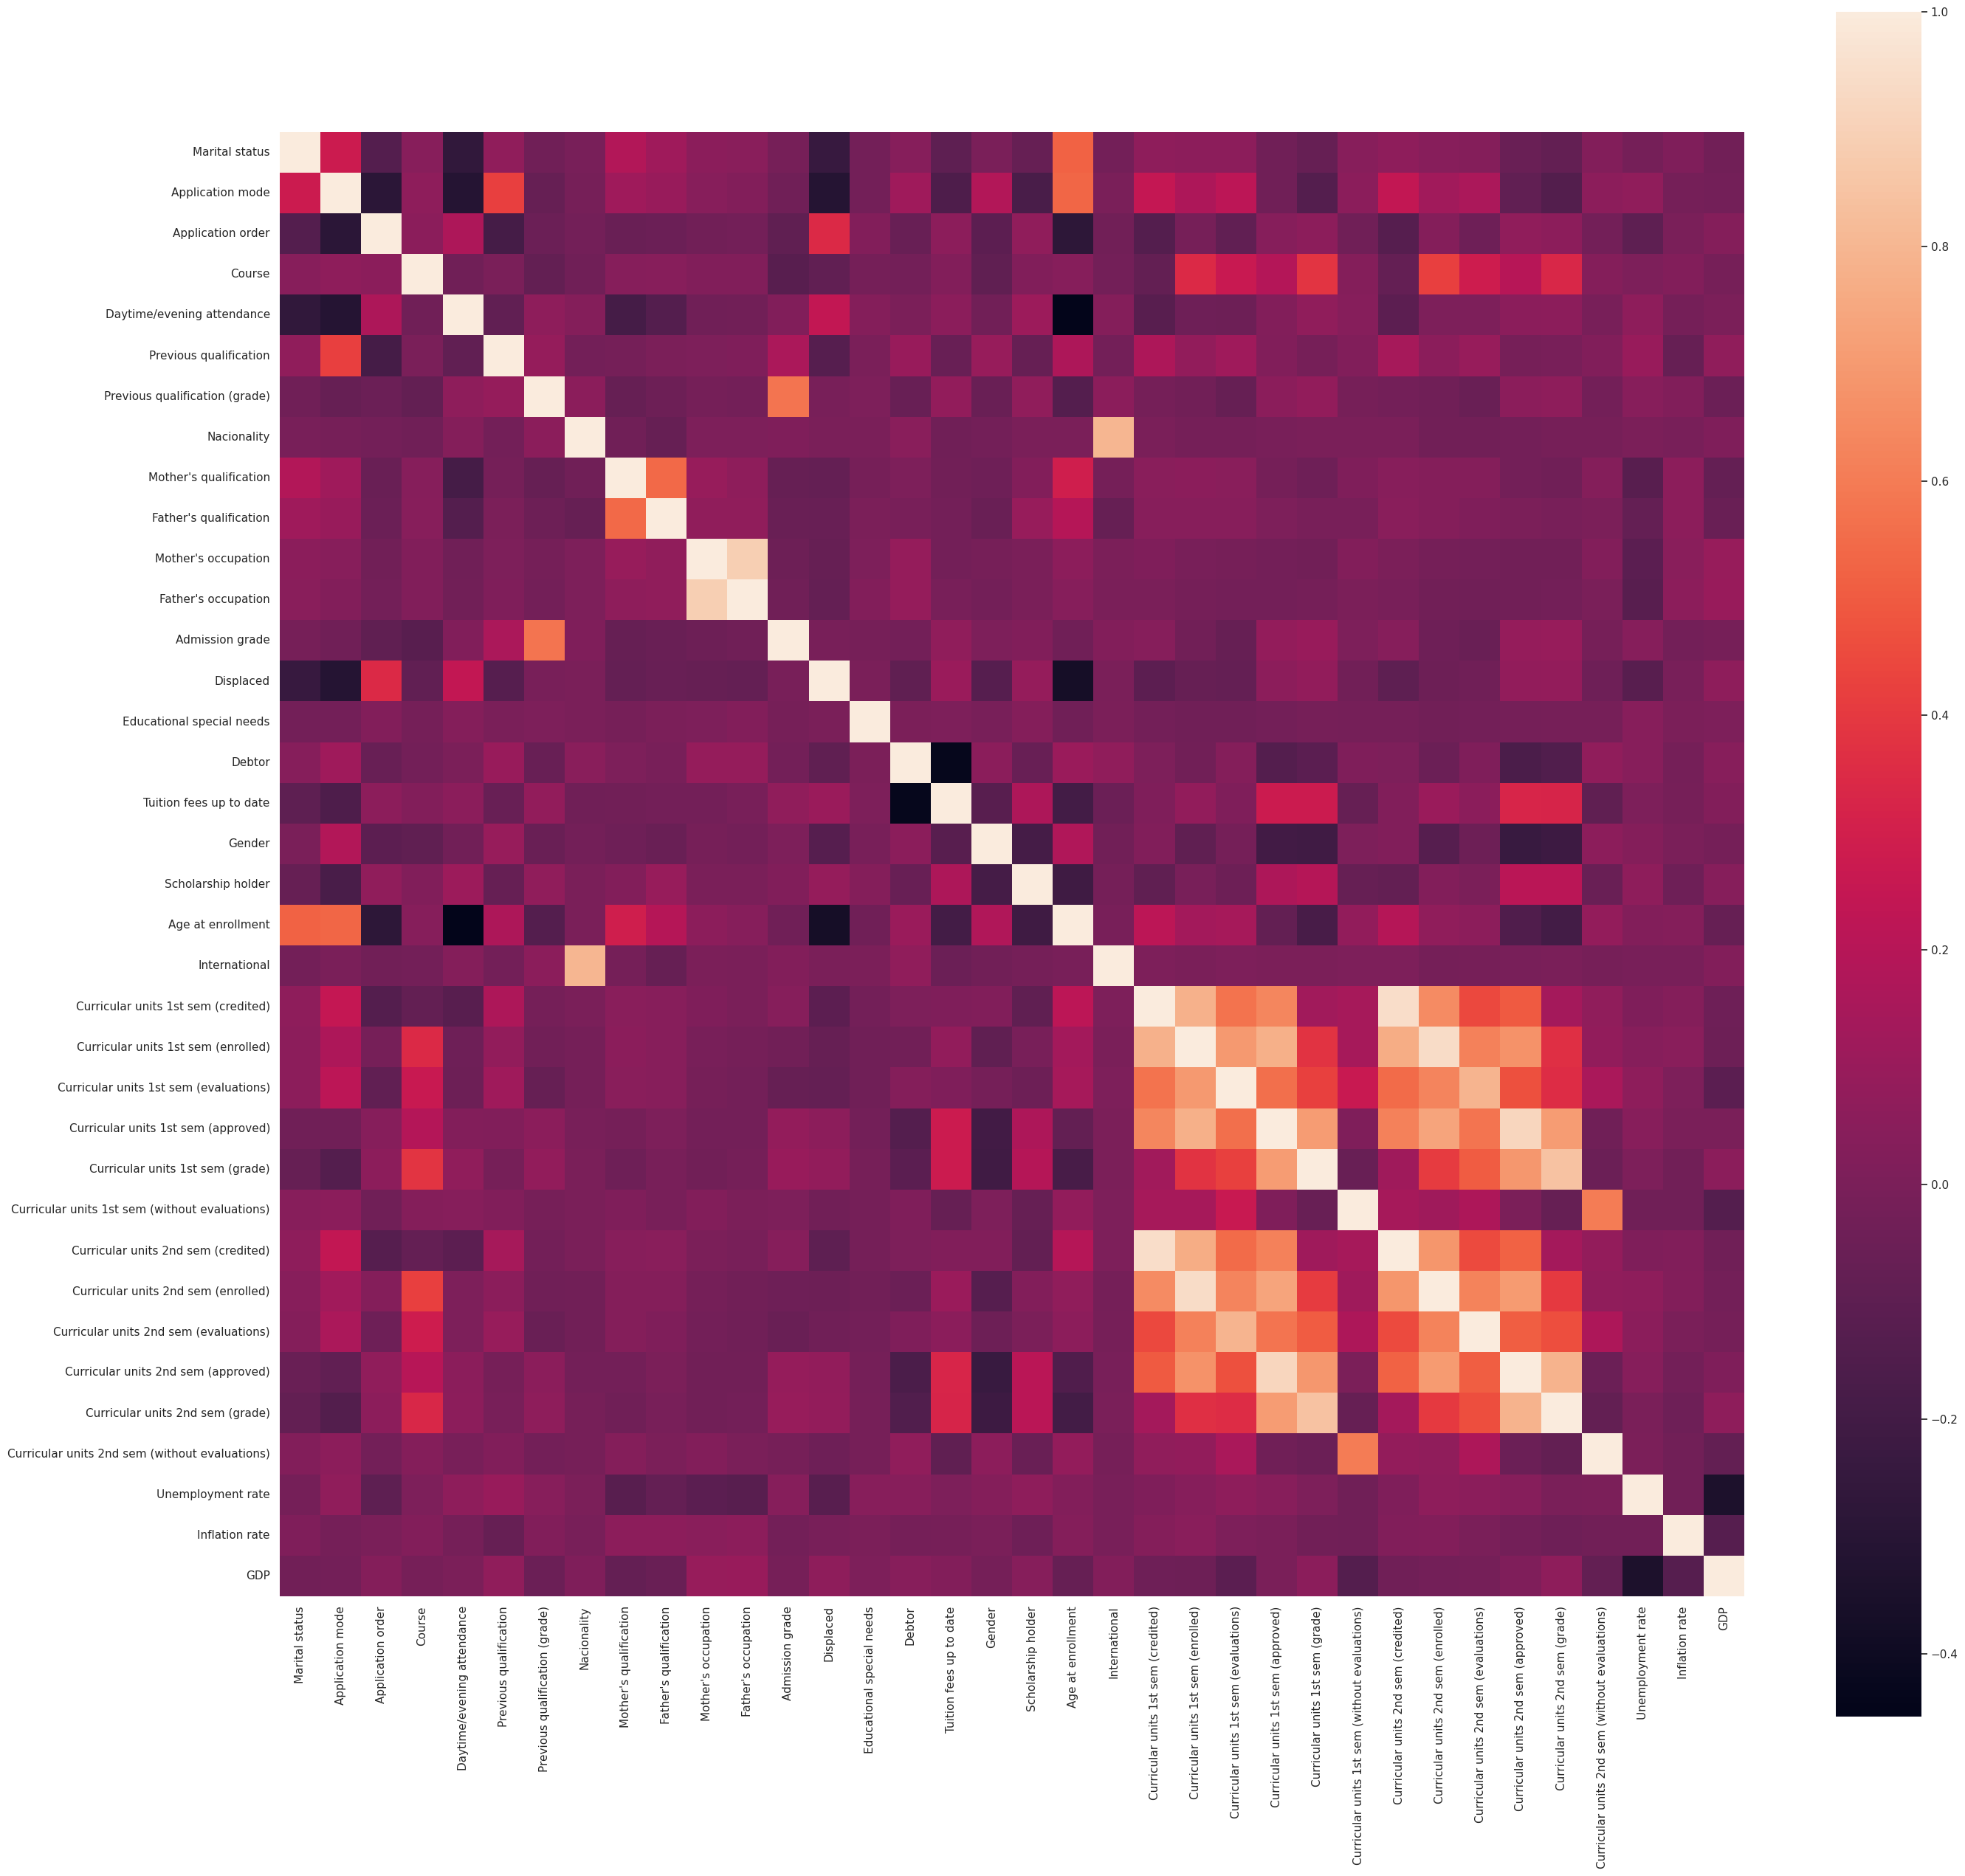

In [ ]:
# finding correlations between attributes
# Computing the correlation matrix
corr = s_df.corr(numeric_only = True)

# Setting up the matplotlib figure
fig, ax = plt.subplots(figsize=(32, 30))

# Drawing the heatmap
sns.heatmap(corr, square=True)
plt.show()


In [ ]:
s_df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [ ]:
s_df.loc[:,'Marital status'].value_counts()

1    3199
2     327
4      75
5      22
6       5
3       2
Name: Marital status, dtype: int64

In [ ]:
s_df.loc[:,'Application mode'].value_counts()

1     1408
17     713
39     664
43     237
44     157
7      132
18     108
42      66
51      46
16      30
53      25
15      20
10      10
5        8
2        3
57       1
26       1
27       1
Name: Application mode, dtype: int64

In [ ]:
s_df.loc[:,'Application order'].value_counts()

1    2461
2     451
3     249
4     218
5     129
6     121
0       1
Name: Application order, dtype: int64

In [ ]:
s_df.loc[:,'Course'].value_counts()

9500    666
9238    313
9773    297
9147    272
9085    262
9670    220
9991    214
9254    211
8014    194
9070    184
171     178
9003    173
9853    142
9130    120
9119    106
9556     69
33        9
Name: Course, dtype: int64

In [ ]:
s_df.loc[:,'Daytime/evening attendance'].value_counts()

1    3222
0     408
Name: Daytime/evening attendance, dtype: int64

In [ ]:
s_df.loc[:,'Previous qualification'].value_counts()

1     3019
39     164
19     149
3      122
12      39
40      34
42      28
2       22
6       15
9       11
4        7
43       6
38       6
10       4
15       2
5        1
14       1
Name: Previous qualification, dtype: int64

In [ ]:
s_df.loc[:,'Previous qualification (grade)'].value_counts()

133.1    426
130.0    302
140.0    271
120.0    225
150.0    137
        ... 
117.4      1
190.0      1
188.0      1
166.0      1
126.6      1
Name: Previous qualification (grade), Length: 101, dtype: int64

In [ ]:
s_df.loc[:,'Nacionality'].value_counts()

1      3544
41       32
22       12
26        9
6         8
24        5
11        3
103       3
101       2
100       2
2         2
25        1
62        1
13        1
109       1
21        1
14        1
17        1
105       1
Name: Nacionality, dtype: int64

In [ ]:
s_df.loc[:,"Mother's qualification"].value_counts()

1     865
37    840
19    777
38    471
3     337
34    127
2      60
12     39
4      34
5      16
40      8
9       8
39      6
41      6
6       4
42      4
43      3
29      3
10      3
11      3
36      3
35      3
30      3
14      2
18      1
22      1
27      1
26      1
44      1
Name: Mother's qualification, dtype: int64

In [ ]:
s_df.loc[:,"Father's qualification"].value_counts()

37    1010
19     785
1      732
38     575
3      220
34     109
2       43
12      34
4       32
5       15
39      13
11      10
36       8
9        5
40       5
14       4
22       4
29       3
30       3
10       2
43       2
26       2
35       2
6        2
33       1
27       1
44       1
25       1
20       1
42       1
18       1
13       1
41       1
31       1
Name: Father's qualification, dtype: int64

In [ ]:
s_df.loc[:,'Admission grade'].value_counts()

130.0    125
120.0    121
140.0    117
100.0     93
150.0     67
        ... 
158.0      1
158.3      1
154.9      1
150.4      1
166.0      1
Name: Admission grade, Length: 602, dtype: int64

In [ ]:
s_df.loc[:,'Displaced'].value_counts()

1    1993
0    1637
Name: Displaced, dtype: int64

In [ ]:
s_df.loc[:,'Educational special needs'].value_counts()

0    3590
1      40
Name: Educational special needs, dtype: int64

In [ ]:
s_df.loc[:,'Debtor'].value_counts()

0    3217
1     413
Name: Debtor, dtype: int64

In [ ]:
s_df.loc[:,'Tuition fees up to date'].value_counts()

1    3144
0     486
Name: Tuition fees up to date, dtype: int64

In [ ]:
s_df.loc[:,'Gender'].value_counts()

0    2381
1    1249
Name: Gender, dtype: int64

In [ ]:
s_df.loc[:,'Scholarship holder'].value_counts()

0    2661
1     969
Name: Scholarship holder, dtype: int64

In [ ]:
s_df.loc[:,'Age at enrollment'].value_counts()

18    864
19    754
20    459
21    252
22    137
24    101
23     84
27     79
26     75
25     72
28     68
29     61
32     56
34     48
31     48
35     44
30     43
37     37
33     37
39     33
36     32
41     26
38     25
43     22
44     19
40     19
45     18
47     16
50     14
49     12
46     12
42     11
48      8
51      7
53      6
54      6
55      5
52      4
59      3
17      3
58      3
57      2
60      2
61      1
70      1
62      1
Name: Age at enrollment, dtype: int64

In [ ]:
s_df.loc[:,'International'].value_counts()

0    3544
1      86
Name: International, dtype: int64

In [ ]:
s_df.loc[:,'Curricular units 1st sem (credited)'].value_counts()

0     3150
2       71
1       67
3       57
6       43
4       43
5       31
7       31
8       27
9       24
11      16
10      14
14      14
13      12
12      11
15       5
18       4
17       3
16       3
19       2
20       2
Name: Curricular units 1st sem (credited), dtype: int64

In [ ]:
s_df.loc[:,'Curricular units 1st sem (enrolled)'].value_counts()

6     1594
5      749
7      546
8      264
0      152
12      54
10      43
11      37
9       31
15      24
14      22
4       21
18      19
13      16
17      13
16      12
3        9
2        7
21       6
1        6
19       2
23       2
26       1
Name: Curricular units 1st sem (enrolled), dtype: int64

In [ ]:
s_df.loc[:,'Curricular units 1st sem (evaluations)'].value_counts()

8     674
7     621
6     530
0     321
9     296
10    235
5     193
11    162
12    160
13    104
14     77
15     49
16     37
17     29
18     22
19     18
4      18
21     15
22     10
20     10
23      9
3       6
2       6
24      5
1       5
26      4
25      3
45      2
29      2
27      2
36      1
32      1
31      1
28      1
33      1
Name: Curricular units 1st sem (evaluations), dtype: int64

In [ ]:
s_df.loc[:,'Curricular units 1st sem (approved)'].value_counts()

6     1033
0      647
5      530
7      429
4      288
3      176
2      118
1       94
8       94
11      42
12      40
9       35
13      23
10      21
18      15
14      14
17      10
15       6
16       5
21       4
20       3
19       2
26       1
Name: Curricular units 1st sem (approved), dtype: int64

In [ ]:
s_df.loc[:,'Curricular units 1st sem (grade)'].value_counts()

0.00     647
12.00    153
13.00    123
11.00     95
14.00     70
        ... 
12.46      1
13.42      1
11.79      1
11.68      1
14.91      1
Name: Curricular units 1st sem (grade), Length: 746, dtype: int64

In [ ]:
s_df.loc[:,'Curricular units 1st sem (without evaluations)'].value_counts()

0     3406
1      118
2       58
3       16
4       14
6        5
7        5
5        3
12       2
8        2
10       1
Name: Curricular units 1st sem (without evaluations), dtype: int64

In [ ]:
s_df.loc[:,'Curricular units 2nd sem (credited)'].value_counts()

0     3183
1       82
2       80
5       61
4       61
3       40
6       24
11      20
9       13
12      13
7       12
10      11
8       10
13       9
14       4
15       2
16       2
18       2
19       1
Name: Curricular units 2nd sem (credited), dtype: int64

In [ ]:
s_df.loc[:,'Curricular units 2nd sem (enrolled)'].value_counts()

6     1596
5      789
8      596
7      224
0      152
11      50
9       44
12      39
10      38
13      34
14      22
4       15
17      10
2        5
1        3
19       3
3        2
15       2
23       2
18       2
16       1
21       1
Name: Curricular units 2nd sem (enrolled), dtype: int64

In [ ]:
s_df.loc[:,'Curricular units 2nd sem (evaluations)'].value_counts()

8     654
6     556
7     478
0     372
9     353
5     268
10    257
11    181
12    150
13     98
14     77
15     53
16     36
18     18
17     15
19     11
4       8
21      8
22      8
20      8
2       4
23      4
1       3
26      3
24      3
27      1
25      1
33      1
3       1
Name: Curricular units 2nd sem (evaluations), dtype: int64

In [ ]:
s_df.loc[:,'Curricular units 2nd sem (approved)'].value_counts()

6     867
0     802
5     569
8     306
7     287
4     254
3     161
2     121
1      86
11     44
12     32
10     32
9      25
13     21
17      8
14      6
19      3
20      2
16      2
18      2
Name: Curricular units 2nd sem (approved), dtype: int64

In [ ]:
s_df.loc[:,'Curricular units 2nd sem (grade)'].value_counts()

0.00     802
12.00    122
13.00    117
11.00    111
14.00     63
        ... 
13.25      1
10.92      1
13.03      1
11.33      1
11.08      1
Name: Curricular units 2nd sem (grade), Length: 720, dtype: int64

In [ ]:
s_df.loc[:,'Curricular units 2nd sem (without evaluations)'].value_counts()

0     3416
1      107
2       35
3       23
5       16
4       16
6        7
7        4
8        4
12       2
Name: Curricular units 2nd sem (without evaluations), dtype: int64

In [ ]:
s_df.loc[:,'Unemployment rate'].value_counts()

7.6     452
10.8    435
9.4     424
12.7    356
12.4    355
11.1    347
15.5    328
13.9    326
16.2    316
8.9     291
Name: Unemployment rate, dtype: int64

In [ ]:
s_df.loc[:,'Inflation rate'].value_counts()

 1.4    726
 2.6    452
-0.8    424
 3.7    356
 0.5    355
 0.6    347
 2.8    328
-0.3    326
 0.3    316
Name: Inflation rate, dtype: int64

In [ ]:
s_df.loc[:,'GDP'].value_counts()

 0.32    452
 1.74    435
-3.12    424
-1.70    356
 1.79    355
 2.02    347
-4.06    328
 0.79    326
-0.92    316
 3.51    291
Name: GDP, dtype: int64

In [ ]:
#Standardization
x = s_df[['Unemployment rate','GDP','Inflation rate','Age at enrollment']]
scaler = StandardScaler()
scaled = scaler.fit_transform(x)
scaled.shape

(3630, 4)

In [ ]:
#labelencoding
lblencoder = LabelEncoder()
enc_df = s_df['Target']
enc_df = lblencoder.fit_transform(enc_df).reshape(-1,1)
enc_df.shape

(3630, 1)

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled, enc_df, test_size=0.2, random_state=42)

# Fit logistic regression model on training data
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)
    logreg.fit(X_train, y_train)


# Evaluate performance on testing data
score = logreg.score(X_test, y_test)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.6749311294765841


In [ ]:
# Calculate the precision of the model
precision = precision_score(y_test, y_pred)

# Print the precision
print("Precision:", precision)

Precision: 0.6518518518518519


In [ ]:
# Calculate the recall of the model
recall = recall_score(y_test, y_pred, average='weighted')

# Print the recall
print("Recall:", recall)

Recall: 0.6749311294765841


In [ ]:
F1 = 2 * (precision * recall) / (precision + recall)
print("f1: ",F1)

f1:  0.6631907596241099
